In [11]:
import numpy as np
from utils import ZeroDFullydynamic,ZeroDQuasidynamic,advance,solve
import matplotlib.pyplot as plt


In [12]:
Tmax=300
cs=3000
vpl=1e-5
G=2e9
sigma=5e6
a=0.01
b=0.015
drs=1e-5
v0=1.01*vpl
theta0=drs/vpl
u0=np.array([v0,theta0])
problem=ZeroDQuasidynamic(Tmax,u0,a,b,sigma,drs,G,cs,vpl)

In [13]:
t=0
u=u0.reshape(1,2)
i=1
dt_const=1e-6
T=np.array([0]).reshape(1,1)
while T[-1]<Tmax:
    dt=dt_const/u[-1,0]
    T=np.append(T,(T[-1,0]+dt).reshape(1,1),axis=0)
    u_new=advance(dt,u[-1,:],problem.RHS)
    u=np.append(u,u_new,axis=0)

In [14]:
u

array([[1.01000000e-05, 1.00000000e+00],
       [1.01108597e-05, 9.99005593e-01],
       [1.01213976e-05, 9.98006226e-01],
       ...,
       [2.05581176e-07, 2.57843778e+00],
       [3.07135107e-07, 6.92151835e+00],
       [7.24691715e-07, 8.91958648e+00]])

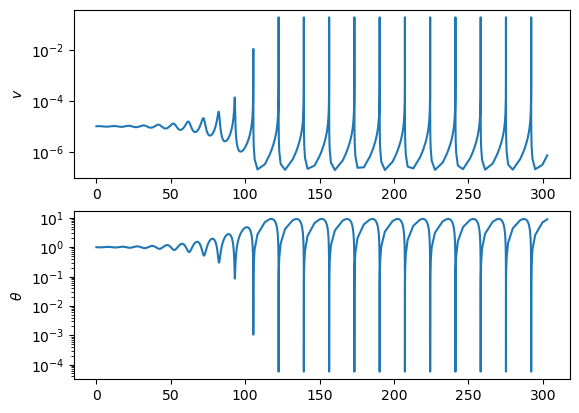

In [15]:
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.plot(T,u[:,0])
ax1.set_ylabel(r'$v$')
ax1.set_yscale('log')
ax2.plot(T,u[:,1])
ax2.set_ylabel(r'$\theta$')
ax2.set_yscale('log')

